In [83]:
## This code compare the (s and v- shaped) Binary  Particle Swarm Optimisation 
## algoritum, Particle Swarm embed on Quantum Evolutionary Algorithm with a Q-Learning Method
## Carlos Claiton N. Kuhn
## contact: carlos.kuhn@dst.defence.gov.au
## 06/05/2020
## 03/06/2020

import numpy as np
import random
import math
import matplotlib.pyplot as plt
import statistics as stats
from ModelBS import ModelBS as ModelBS
from BPSO import BPSO as BPSO
from QLearning import QLearning as QLearning
from time import time
from PSEQEA import PSEQEA as PSEQEA

Max_iteration=5000  # Maximum number of iterations
NumbRuns = 50     # Nubmer of runs


############# DEPENDENCE LEVEL #####################
DepLevel = 0;          # Dependence Levels use DepLevel = 4 -> Independent
                       #                       DepLevel = 3 -> Tangential
                       #                       DepLevel = 2 -> Associated
                       #                       DepLevel = 1 -> Dependente
                       #                       DepLevel = 0 -> Mandatory
                
BudgetArray = 6  # 10;#5;                     # Budget array
OptAnalytical = 7.1  # 8.1;#6.8;              # analytical Optimum score
NumbInitiative = 15 #[15,50,100];#,50,100];%,150];%300,400,500]';

model=ModelBS(DepLevel,NumbInitiative,BudgetArray)
fitness = model.MyCost
noV = len(model.Cost)
noP = 30

elapsed = np.ones(4)*math.nan
gBest = np.ones((4,NumbRuns,noV))*math.nan
gBestScore = np.ones((4,NumbRuns))*math.nan
ConvergenceCurve = np.ones((4,NumbRuns,Max_iteration))*math.nan
IterNumb = np.ones((4,NumbRuns))*math.nan


t=time()
for i in range(NumbRuns):
    gBest[0,i,:],gBestScore[0,i],ConvergenceCurve[0,i,:],IterNumb[0,i] = BPSO(noP,Max_iteration,2,fitness,noV)
    
elapsed[0] = time() - t

t=time()
for i in range(NumbRuns):
    gBest[1,i,:],gBestScore[1,i],ConvergenceCurve[1,i,:],IterNumb[1,i] = BPSO(noP,Max_iteration,8,fitness,noV)

elapsed[1] = time() - t

t=time()
for i in range(NumbRuns):
    gBest[2,i,:],gBestScore[2,i],ConvergenceCurve[2,i,:],IterNumb[2,i] = QLearning(noP,Max_iteration,fitness,noV)
    
elapsed[2] = time() - t

t=time()
for i in range(NumbRuns):
    gBest[3,i,:],gBestScore[3,i],ConvergenceCurve[3,i,:],IterNumb[3,i] = PSEQEA(noP,Max_iteration,fitness,noV)    
elapsed[3] = time() - t



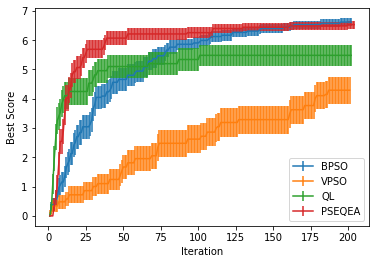

In [84]:
# comparing the both BSPO methods  and Q-learning by convergency curves

MeanConv = np.ones((4,Max_iteration))*math.nan
StdConv = np.ones((4,Max_iteration))*math.nan

ConvergenceCurveScore = 1/ConvergenceCurve

for i in range(4):
    for j in range(Max_iteration):
        MeanConv[i,j] = stats.mean(ConvergenceCurveScore[i,:,j])
        StdConv[i,j] = stats.stdev(ConvergenceCurveScore[i,:,j])/np.sqrt(NumbRuns)
        
x_axix = np.arange(Max_iteration)
# BPSO
yerr = StdConv[0,:]
plt.errorbar(x_axix, MeanConv[0,:], yerr=yerr, label='both limits (default)')
# VPSO
yerr = StdConv[1,:]
plt.errorbar(x_axix, MeanConv[1,:], yerr=yerr, label='both limits (default)')
#QL
yerr = StdConv[2,:]
plt.errorbar(x_axix, MeanConv[2,:], yerr=yerr, label='both limits (default)')
#PSEQEA
yerr = StdConv[3,:]
plt.errorbar(x_axix, MeanConv[3,:], yerr=yerr, label='both limits (default)')
plt.ylabel('Best Score')
plt.xlabel('Iteration')
plt.legend(['BPSO','VPSO','QL','PSEQEA'])
plt.show()


In [85]:
Method = ['BPSO','VPSO','QL','PSEQEA']
MeanScore = np.ones(4)*math.nan
StdScore = np.ones(4)*math.nan
number_hits = np.ones(4)*math.nan
Mean_IterNumb = np.ones(4)*math.nan

display = np.ones((2,6))

Best_score = 1/gBestScore

print(f'Budget =  {BudgetArray} , Known Score = {OptAnalytical}, Number of Initiatives:  {NumbInitiative}, Number of runs: {NumbRuns}')
print(f'Method , Mean Score , Stderror Score, Number of hit, elepsed time, Number of Iterations')
for i, value in enumerate(Method):
    MeanScore[i] = round(stats.mean(Best_score[i,:]),3)
    StdScore[i] = round(stats.stdev(Best_score[i,:]),3)
    hits = np.where(Best_score[i,:]==OptAnalytical)
    number_hits[i] = np.shape(hits)[1]
    Mean_IterNumb[i] = stats.mean(IterNumb[i,:])
    
    print(f'{value} = {MeanScore[i]}, {StdScore[i]}, {number_hits[i]}, {round(elapsed[i],3)}, {Mean_IterNumb[i]}')
    


Budget =  6 , Known Score = 7.1, Number of Initiatives:  15, Number of runs: 50
Method , Mean Score , Stderror Score, Number of hit, elepsed time, Number of Iterations
BPSO = 6.748, 0.815, 42.0, 147.018, 273.24
VPSO = 5.338, 2.679, 30.0, 136.898, 316.98
QL = 5.48, 2.576, 31.0, 39.846, 213.22
PSEQEA = 6.528, 0.975, 37.0, 112.322, 226.64


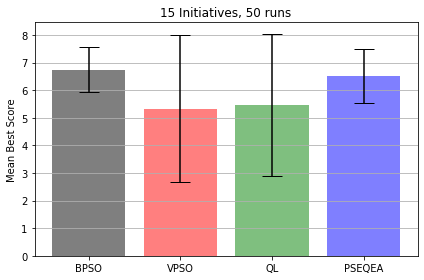

In [86]:

#Plot the mean best score in the number of Runs
fig, ax = plt.subplots()
error = StdScore
x_pos = np.arange(len(Method))
ax.bar(x_pos, MeanScore, yerr=error, align='center', alpha=0.5,color=['black', 'red', 'green','blue'], ecolor='black', capsize=10)
ax.set_ylabel('Mean Best Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(Method)
ax.set_title( str(NumbInitiative) + ' Initiatives, ' + str(NumbRuns)+ ' runs')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Mean_Best_Score')
plt.show()


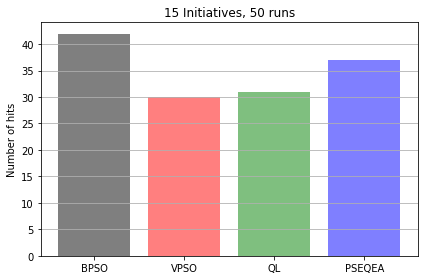

In [87]:
#Plot the number of Hits (find the correct optimum)
fig, ax = plt.subplots()
ax.bar(x_pos, number_hits, align='center', alpha=0.5,color=['black', 'red', 'green','blue'], capsize=10)
ax.set_ylabel('Number of hits')
ax.set_xticks(x_pos)
ax.set_xticklabels(Method)
ax.set_title(str(NumbInitiative) + ' Initiatives, ' + str(NumbRuns)+ ' runs')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Number_of_hits')
plt.show()

